In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
diabetes = datasets.load_diabetes()

In [3]:
data = pd.DataFrame(diabetes.data) 

# .data is numpy array object used to convert the sklearn learn object to numpy object
# to create a datafram

data.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
diabetes_X = diabetes.data[:, np.newaxis, 2]

In [5]:
type(diabetes_X)

numpy.ndarray

In [6]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_text = diabetes_X[-20:]
print("length of train and test dataset:", len(diabetes_X_train), len(diabetes_X_text))

length of train and test dataset: 422 20


In [7]:
diabetes_Y_train = diabetes.target[:-20]
diabetes_Y_test = diabetes.target[-20:]

In [8]:
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
diabetes_Y_predict = regr.predict(diabetes_X_text)

In [10]:
print("Coefficient: ", regr.coef_)

Coefficient:  [938.23786125]


In [11]:
print("mean squared error: %.2f" %mean_squared_error(diabetes_Y_test, diabetes_Y_predict))

mean squared error: 2548.07


In [12]:
print("variance using R-squared: %.2f" %r2_score(diabetes_Y_test, diabetes_Y_predict))

variance using R-squared: 0.47


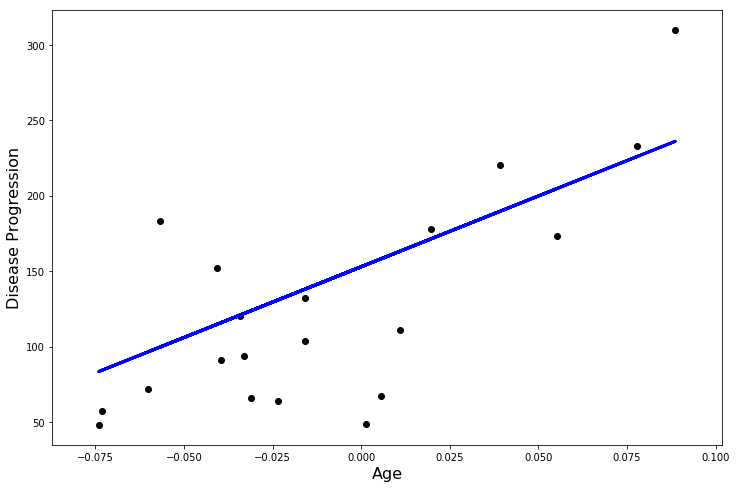

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(diabetes_X_text, diabetes_Y_test, color = 'black')
plt.plot(diabetes_X_text, diabetes_Y_predict, color = 'blue', linewidth = 3)
plt.xticks()
plt.yticks()
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Disease Progression', fontsize = 16)
plt.show()

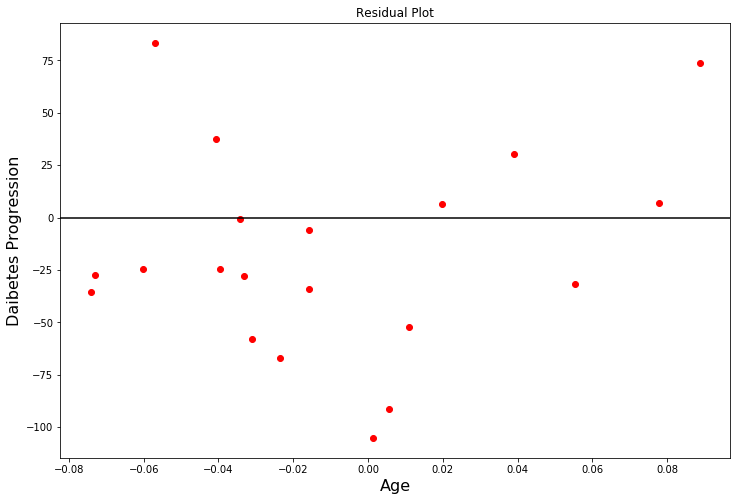

In [14]:
plt.figure(figsize = (12,8))
plt.title("Residual Plot")
plt.plot(diabetes_X_text, diabetes_Y_test-diabetes_Y_predict, 'ro')
plt.axhline(y=0, color='k')
plt.xticks()
plt.yticks()
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Daibetes Progression', fontsize=16)
plt.show()